In [1]:
import pandas as pd

url = "modified_property_data.csv"
data = pd.read_csv(url)
data

,SquareFeet,Density,City,price
0,850,low,CityA,425000
1,779,medium,CityB,467040
2,990,medium,CityA,693000
3,665,medium,CityC,399000
4,550,medium,CityC,330000
5,880,medium,CityB,528000
6,567,low,CityB,283500
7,1020,low,CityB,408000
8,2067,high,CityC,1447830
9,577,high,CityA,462400


In [2]:
#pre-data processing
#convert sqft to m^2
#convert price to k

data["SquareFeet"] = data["SquareFeet"] * 0.092903
data['price'] = data['price'] / 1000

In [3]:
data["Density"] = data["Density"].map({"low": 0, "medium": 1, "high" : 2})
data

,SquareFeet,Density,City,price
0,78.967550,0,CityA,425.00
1,72.371437,1,CityB,467.04
2,91.973970,1,CityA,693.00
3,61.780495,1,CityC,399.00
4,51.096650,1,CityC,330.00
5,81.754640,1,CityB,528.00
6,52.676001,0,CityB,283.50
7,94.761060,0,CityB,408.00
8,192.030501,2,CityC,1447.83
9,53.605031,2,CityA,462.40


## One Hot Encoding

In [4]:
#Convert City to CityA, CityB, CityC
#drop CityC is because if CityA and CityB are 0. it means it is CityC

In [5]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(data[["City"]])
city_encoded = onehot_encoder.transform(data[["City"]]).toarray()

data[["CityA","CityB","CityC"]] = city_encoded
data = data.drop(["City","CityC"],axis=1)
data

,SquareFeet,Density,price,CityA,CityB
0,78.967550,0,425.00,1.0,0.0
1,72.371437,1,467.04,0.0,1.0
2,91.973970,1,693.00,1.0,0.0
3,61.780495,1,399.00,0.0,0.0
4,51.096650,1,330.00,0.0,0.0
5,81.754640,1,528.00,0.0,1.0
6,52.676001,0,283.50,0.0,1.0
7,94.761060,0,408.00,0.0,1.0
8,192.030501,2,1447.83,0.0,0.0
9,53.605031,2,462.40,1.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

x = data[["SquareFeet","Density","CityA","CityB"]]
y = data["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=80)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
from torch import nn

class MultiRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 4, out_features = 1,dtype = torch.float64) #1 feature and 1 output, in_features can set to multiple feature

    def forward(self,x):
        return self.linear_layer(x)

In [10]:
torch.manual_seed(87)
model = MultiRegressionModel()
model.to(device)
model.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], device='cuda:0',
                     dtype=torch.float64)),
             ('linear_layer.bias',
              tensor([-0.4544], device='cuda:0', dtype=torch.float64))])

In [11]:
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [12]:
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [13]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [14]:
cost_fn = nn.MSELoss()

In [15]:
y_pred = model(x_train)
cost = cost_fn(y_pred,y_train)
print(model.state_dict()) #before
print(cost) #before

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.00005,momentum=0.9,weight_decay=1e-4)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_train)
cost = cost_fn(y_pred,y_train)
print(model.state_dict()) #after
print(cost) #after

OrderedDict([('linear_layer.weight', tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], device='cuda:0',
       dtype=torch.float64)), ('linear_layer.bias', tensor([-0.4544], device='cuda:0', dtype=torch.float64))])
tensor(421352.7562, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[-0.4423,  0.1580, -0.1496, -0.1349]], device='cuda:0',
       dtype=torch.float64)), ('linear_layer.bias', tensor([-0.3981], device='cuda:0', dtype=torch.float64))])
tensor(421264.1937, device='cuda:0', dtype=torch.float64,
       grad_fn=<MseLossBackward0>)


In [16]:
#Loop
epochs = 10000

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs):
    model.train() # to indicate now is in train phase
    #model.eval() # to indicate in test phase
    
    y_pred = model(x_train)
    train_cost = cost_fn(y_pred, y_train)
    train_cost_hist.append(train_cost.cpu().detach().numpy()) # .detach().numpy() is convert the cost to numpy without track the gradient descent 
    
    optimizer.zero_grad()
    train_cost.backward()
    optimizer.step()

    model.eval() #test phase
    with torch.inference_mode():   #no need to run gradient descent because it is in test phase
        test_pred = model(x_test)
        test_cost = cost_fn(test_pred,y_test)
        test_cost_hist.append(test_cost.cpu())

    if epoch%1000==0:
        print(f"{epoch:5} - train_cost : {train_cost: .4e} : test_cost : {test_cost : .4e}")

    0 - train_cost :  4.2126e+05 : test_cost :  5.0313e+05
 1000 - train_cost :  5.6669e+04 : test_cost :  8.4981e+04
 2000 - train_cost :  1.1009e+04 : test_cost :  2.1097e+04
 3000 - train_cost :  4.9465e+03 : test_cost :  9.7820e+03
 4000 - train_cost :  4.0993e+03 : test_cost :  7.2088e+03
 5000 - train_cost :  3.9743e+03 : test_cost :  6.4408e+03
 6000 - train_cost :  3.9546e+03 : test_cost :  6.1621e+03
 7000 - train_cost :  3.9512e+03 : test_cost :  6.0497e+03
 8000 - train_cost :  3.9505e+03 : test_cost :  6.0019e+03
 9000 - train_cost :  3.9504e+03 : test_cost :  5.9810e+03


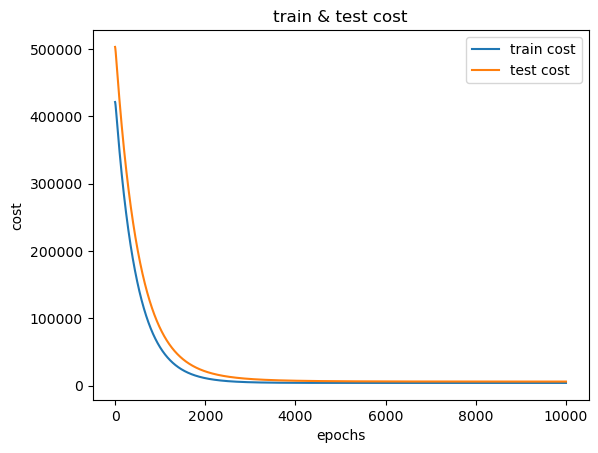

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(0,10000), train_cost_hist, label = "train cost")
plt.plot(range(0,10000), test_cost_hist, label = "test cost")
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

In [18]:
model.eval()
with torch.inference_mode():
    y_pred = model(x_test)
y_pred,y_test

(tensor([[ 554.7380],
         [ 474.6778],
         [ 229.7757],
         [ 522.1014],
         [ 173.0035],
         [ 594.3884],
         [1387.1462]], device='cuda:0', dtype=torch.float64),
 tensor([[ 452.0000],
         [ 467.0400],
         [ 216.0000],
         [ 513.0000],
         [ 283.5000],
         [ 630.0000],
         [1519.2000]], device='cuda:0', dtype=torch.float64))

In [19]:
# sq = 80.5
# density = 1
# checkdensity = "high" if density == 1 else "low"
# cityA = 0
# cityB = 1

# x_realData = np.array([[sq,density,cityA,cityB]])
# x_realData = scaler.transform(x_realData)
# y_realData = (x_realData * w_final).sum(axis=1) + b_final
# price = round(y_realData[0],2)

# print(f'Square feet(m^2): {sq} : Density: {checkdensity} : cityA : {cityA}: cityB: {cityB}: The price is: {price} k')

In [20]:
sq = 80.5
density = 1
checkdensity = "high" if density == 1 else "low"
cityA = 0
cityB = 1

with torch.inference_mode():
    x_realData = torch.tensor(scaler.transform([[sq, density, cityA, cityB]]),dtype=torch.float64)
    x_realData = x_realData.to(device)
    price = round(model(x_realData).item(), 2)

# m^2 to sq ft → multiply by 10.7639
# sq ft to m^2 → multiply by 0.092903

print(f'Square feet: {round((sq * 10.7639),0)} : Density: {checkdensity} : cityA : {cityA}: cityB: {cityB}: The price is: {price} k')

Square feet: 866.0 : Density: high : cityA : 0: cityB: 1: The price is: 529.27 k
